# K-means y hierarchical clustering

In [2]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

#### 1. Realizar un análisis exploratorio de los datos para identificar
#### relaciones entre variables, valores atípicos, tendencias, etc.
#### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y
#### transformándolos según sea necesario.
#### 3. Seleccionar las características más relevantes para entrenar el
#### modelo utilizando selección de características.
#### 4. Entrenar el modelo configurando los diferentes
#### hiperparámetros.
#### 5. Evaluar el desempeño del modelo con métricas como
#### Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.
#### 6. Realizar las diferentes gráficas que permitan visualizar los
#### resultados del modelo
#### 7. Interpretar, analizar y documentar los resultados obtenidos.


In [3]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("D:/Tareas/7 semestre/Analisis de datos/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 1. Realizar un análisis exploratorio de los datos para identificar

In [4]:
data.shape

(200, 5)

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


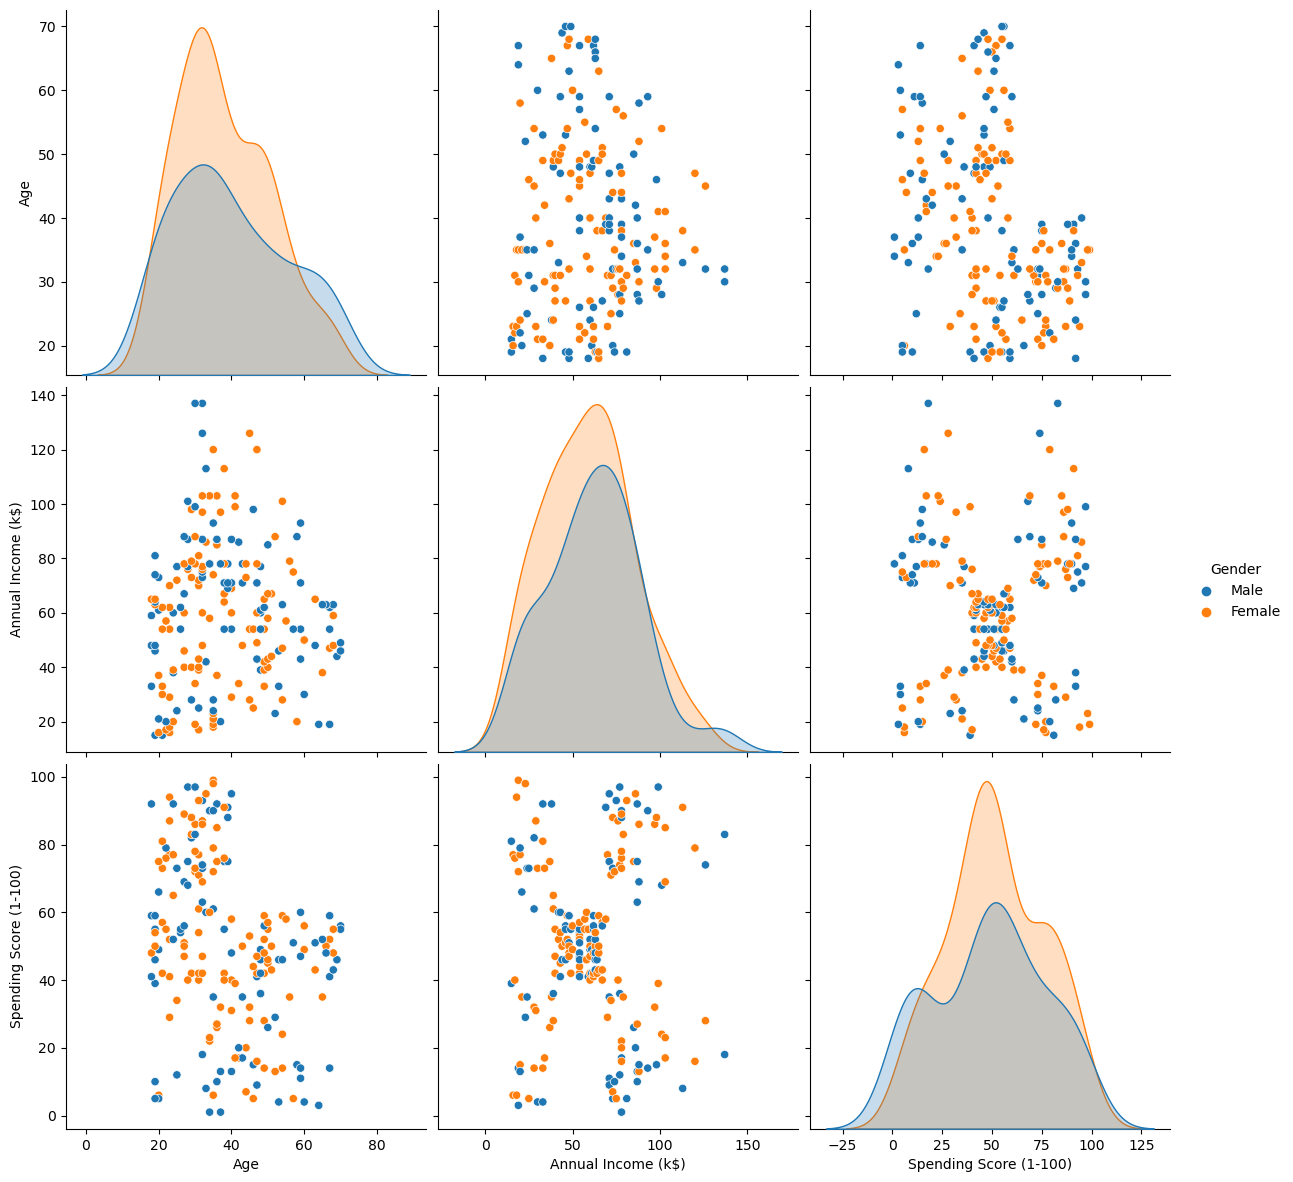

In [8]:
#Grafico de dispersión

sns.pairplot(data.drop('CustomerID', axis=1), size=4,kind='scatter', hue='Gender')

In [9]:
# Matriz de correlación
dataset=data.drop('Gender', axis=1)
corr_matrix = dataset.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

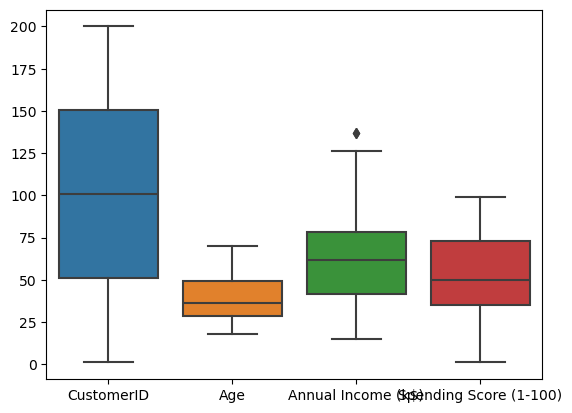

In [10]:
# Diagramas de caja para cada variable por especie
sns.boxplot(data=data)

#### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y
#### transformándolos según sea necesario.

In [11]:
#Transformación de algunos datos a numericos

data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [12]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791,1.118061
196,1.671450,-0.886405,0.441365,2.497807,-0.861839
197,1.688771,1.128152,-0.491602,2.497807,0.923953
198,1.706091,1.128152,-0.491602,2.917671,-1.250054


#### 3. Seleccionar las características más relevantes para entrenar el
#### modelo utilizando selección de características.

In [13]:
Datos = data[['Age','Annual Income (k$)','Spending Score (1-100)']]
Datos.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# KMEANS

#### 4. Entrenar el modelo configurando los diferentes
#### hiperparámetros.

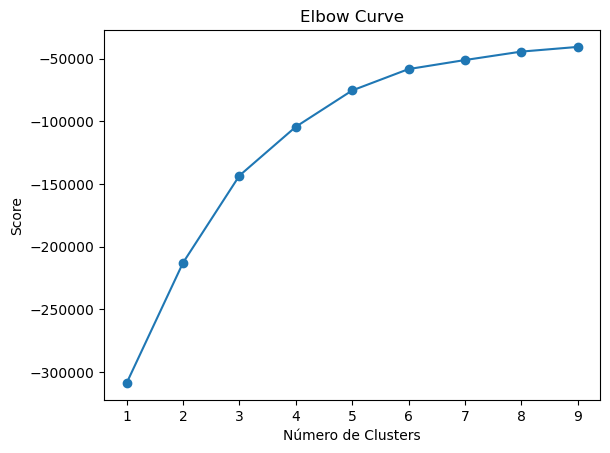

In [14]:
#Encontramos el numero optimo de clusters a utilizar usando el metodo del codo

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [15]:
# Para este estudio tomare como número óptimo de clusters el valor de 4

kmeans = KMeans(n_clusters=3).fit(Datos)
centroids = kmeans.cluster_centers_
centroids

array([[40.39473684, 87.        , 18.63157895],
       [40.32520325, 44.15447154, 49.82926829],
       [32.69230769, 86.53846154, 82.12820513]])

#### 5. Evaluar el desempeño del modelo con métricas como
#### Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [16]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_

In [17]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(Datos, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(Datos, labels))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(Datos, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.3839349967742105
Índice de Calinski-Harabasz: 113.70507138642179
Davies-Bouldin Index: 0.8748062648492884


In [19]:
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

In [20]:
X_new = scaler.fit_transform(np.array([[6.5,5.4,3.3]]))  
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)

[1]
['green']


#### 6. Realizar las diferentes gráficas que permitan visualizar los
#### resultados del modelo

In [ ]:
#Graficas

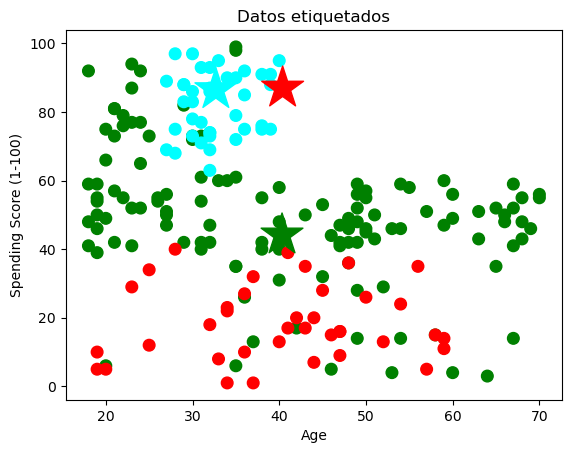

In [21]:
f1 = Datos['Age'].values
f2 = Datos['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

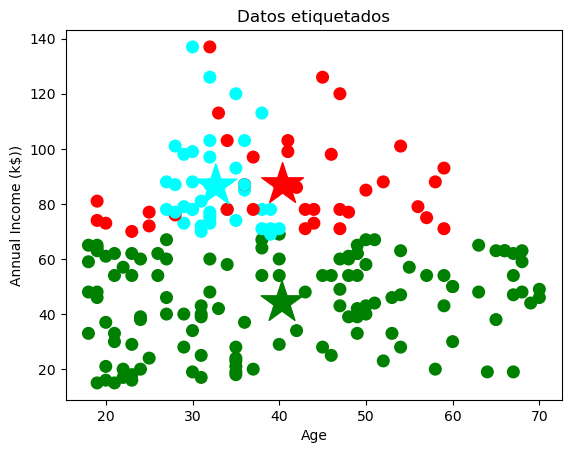

In [22]:
f1 = Datos['Age'].values
f2 = Datos['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$))')
plt.show()

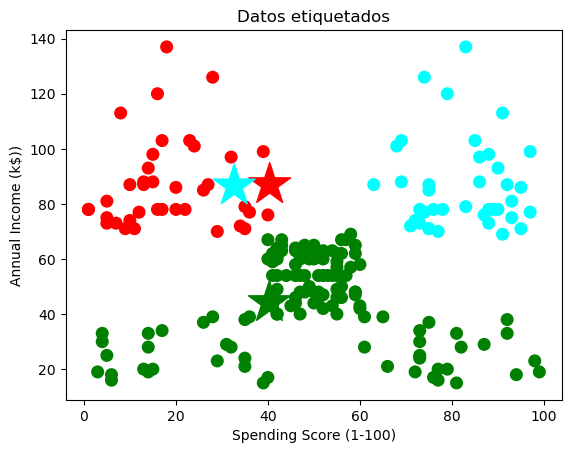

In [23]:
f1 = Datos['Spending Score (1-100)'].values
f2 = Datos['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$))')
plt.show()

In [ ]:
#predicción

# hierarchical clustering

### 4. Entrenar el modelo configurando los diferentes
### hiperparámetros.

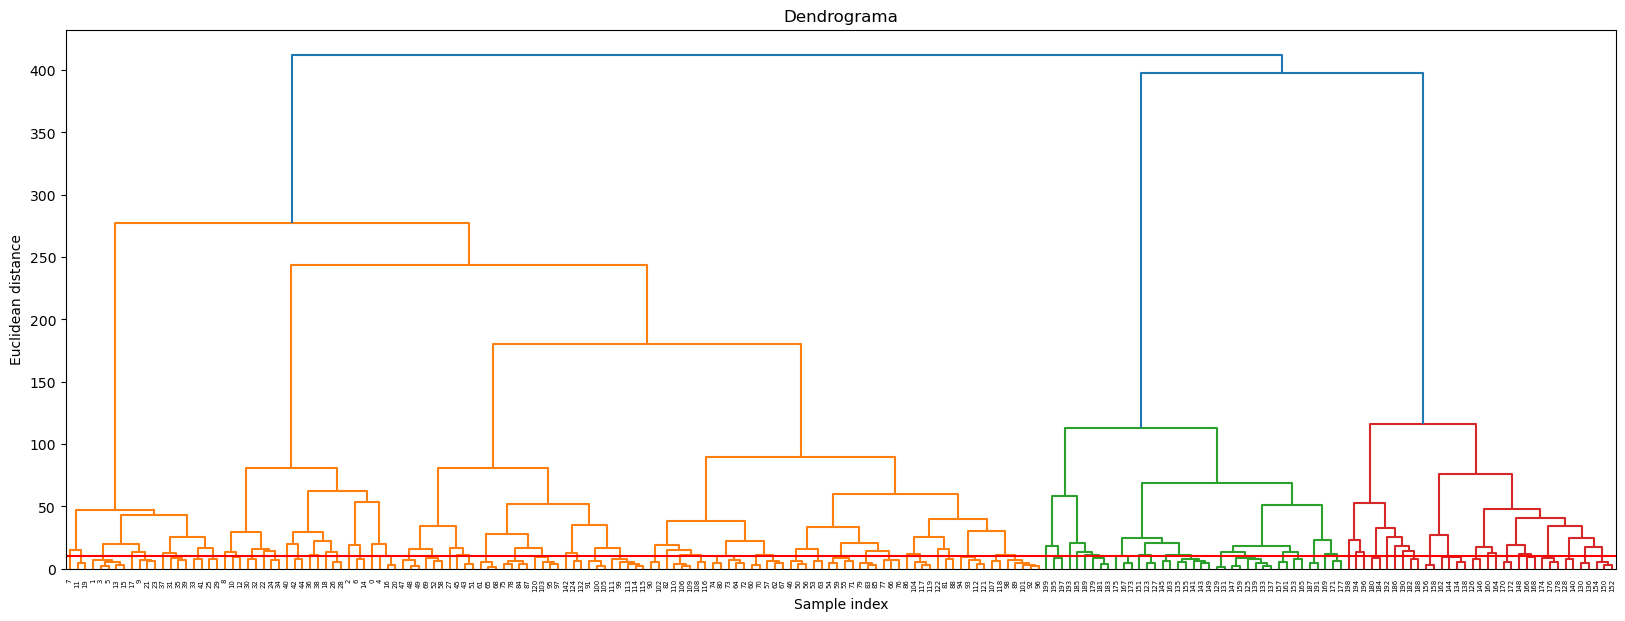

In [24]:
# Usamos el metodo de ward que minimiza la varianza de los clusters que se funcionan y visualizamos la grafica dedrograma

ward_clustering = linkage(Datos, method="ward", metric="euclidean")

plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

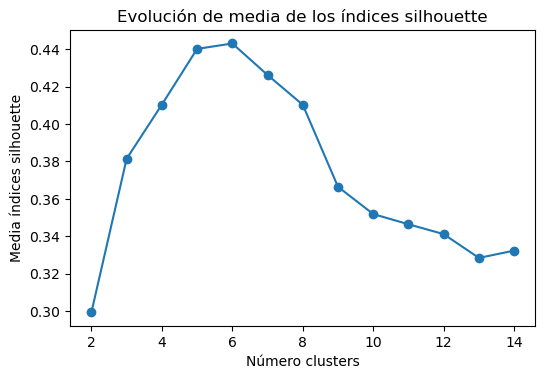

In [25]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(Datos)
    silhouette_avg = silhouette_score(Datos, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [26]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(Datos)
labels_hier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

### 5. Evaluar el desempeño del modelo con métricas como
### Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [27]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(Datos, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(Datos, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(Datos, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.38141795042544546
Índice de Calinski-Harabasz: 111.4623243273518
Davies-Bouldin Index: 0.8603032525623283


In [28]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(Datos)
# Compute the linkage matrix
Z = linkage(Datos, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.66866802140347, array([277.42153431,  53.60747993, 277.42153431, ..., 397.74740753,
        18.27566688, 397.74740753]))


### 6. Realizar las diferentes gráficas que permitan visualizar los
### resultados del modelo

In [29]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

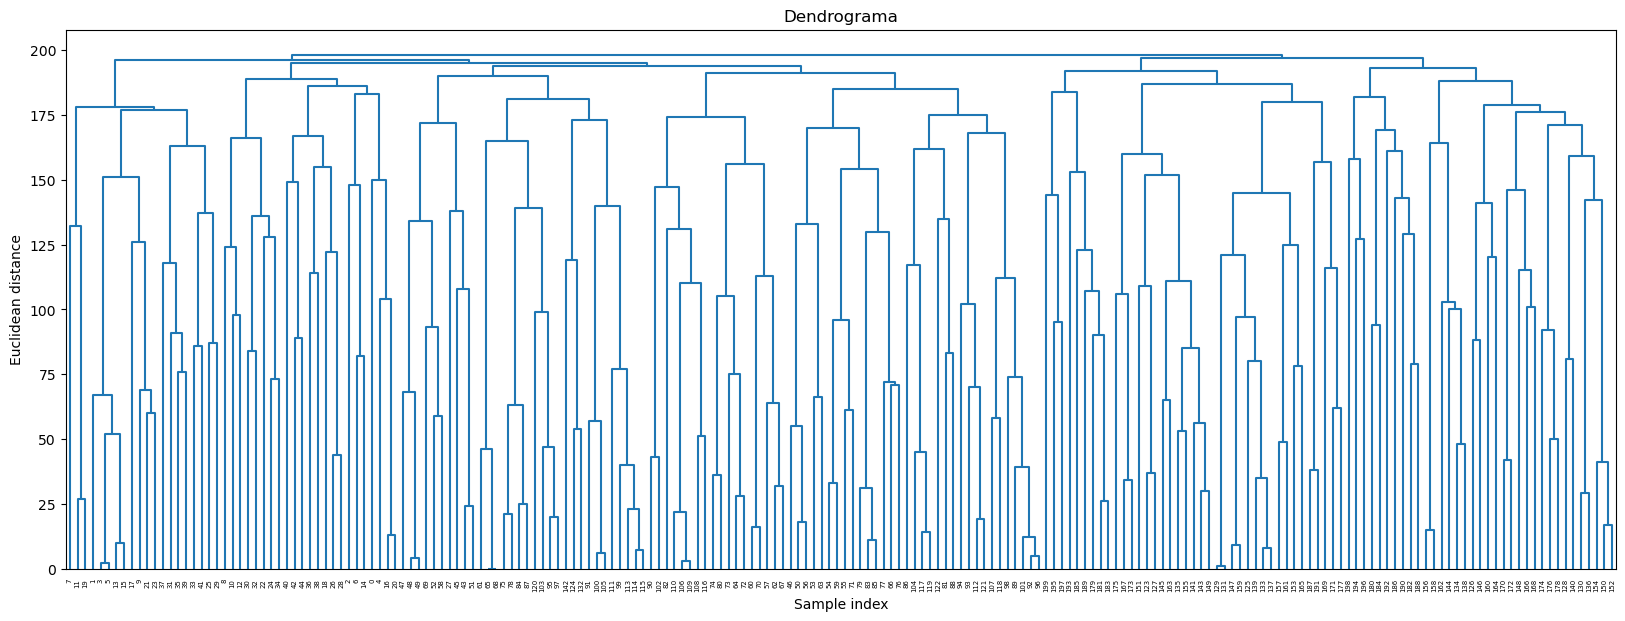

In [30]:
plot_dendrogram(hier_clustering, color_threshold=0)

In [31]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

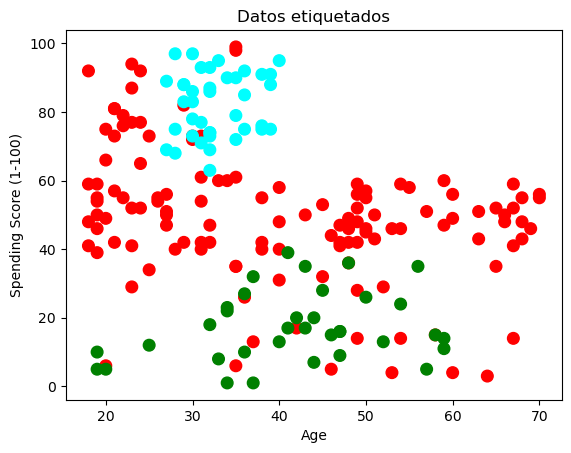

In [32]:
f1 = Datos['Age'].values
f2 = Datos['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

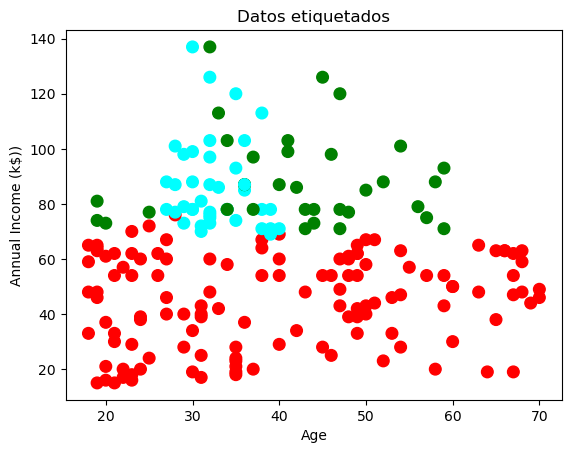

In [33]:
f1 = Datos['Age'].values
f2 = Datos['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$))')
plt.show()

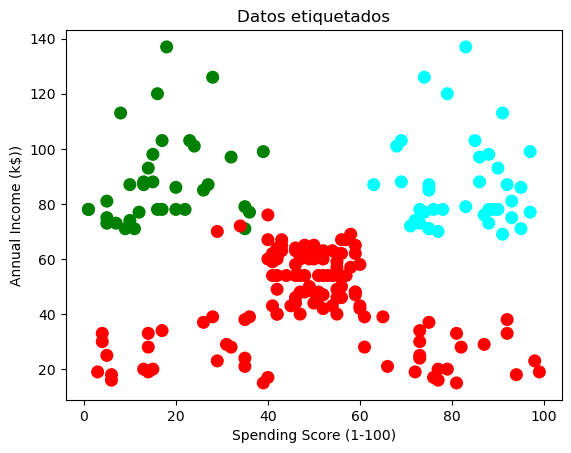

In [34]:
f1 = Datos['Spending Score (1-100)'].values
f2 = Datos['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$))')
plt.show()

## Interpretación K-means:

### - Coeficiente Silhouette: Este nos mide que tan similar es un individuo en un cluster con respecto a los demas individuos del cluster, comparalandolo con los individuos del cluster mas cercano, con esto podemos decir que al obtener un valor cercano a 1 positivo nos indica que los cluster son compactos y que estan bien separados, por lo que al obtener un resultado positivo como el que obtuvimos que fue de 0.384, quiere decir que los cluster estan bien definidos y estan bien separados.

### - Índice Calinski Harabasz: Mide que tan bien estan separados y compactos los grupos. Un valor mayor nos indica una mejor agrupación, osea una mejor separación entre los grupos, por lo que al obtener un valor de 113.71, nos indica una buena calidad de K-means.

### - Índice Davies Bouldin: el valor obtenido fue de 0.875 aproximadamente, que nos indica una buena separación y dispersión, osea que tenemos una buna agrupación, ya que entre mas bajo sea el resultado mejor agrupación se obtendra.

## Interpretación K-means:

### - Coeficiente Silhouette: Obtuvimos un 0.381 como resultado, lo que quiere decir que los clusteres estan bien separados entre si y bien compactos.

### - Índice Calinski Harabasz: Obtuvimos un resultado de 111.5 aproximadamente, lo que quiere decir que tenemos una agrupación buena de los clusters, osea una buena separación entre los grupos.

### - Índice Davies Bouldin: Obtuvimos un resultado de 0.860, lo que quiere decir que tenemos una buena separación y dispersión, ya que el valor es bajo.